In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data/corner_2019.csv")
df = df.dropna().drop("Unnamed: 0", axis=1)
df.index = pd.to_datetime(df.date)
df = df.drop("date", axis=1)
df.head()

,name,text
date,,
2019-12-20 18:03:34+00:00,Niklas,Geilo
2019-12-20 18:02:14+00:00,John,Ai!
2019-12-20 17:59:35+00:00,Felix,😳
2019-12-20 17:52:53+00:00,Artem,Warten auf Gandalf
2019-12-20 17:51:07+00:00,Frederik,Sinnlos in mittelerde


In [44]:
from textblob_de import TextBlobDE as TextBlob

TextBlob("ja lasst euch gut gehen ihr süßis").polarity

1.0

In [45]:
TextBlob("Ich denke halt, dass die Unternehmen sich damit eher selber schaden durch die schlechte Publicity, die sie dadurch dann eben indirekt bekommen").polarity

-1.0

In [38]:
df["polarity"] = df.text.apply(lambda x: TextBlob(x).polarity)

In [81]:
df["subjectivity"] = df.text.apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df.groupby("name").mean()["polarity"].sort_values().plot(kind="bar")
plt.xlabel("Name")
plt.ylabel("Average polarity")
plt.tight_layout()
plt.title("Polarity")
plt.savefig("results/avg_polarity.png")

In [ ]:
f, ax = plt.subplots()
for name, sub_df in df.groupby("name"):
    mean_polarity = sub_df.groupby(sub_df.index.month).mean()
    ax.plot(mean_polarity, label=name)
    
ax.set_xlim(0, 18)    
ax.set_xticks([0, 3, 6, 9, 12])
ax.legend()
f.savefig("results/polarity.png")

In [ ]:
df.sort_values(by="polarity", ascending=False)

In [ ]:
df["2019-03-26 16:37:12+00:00"].text.values

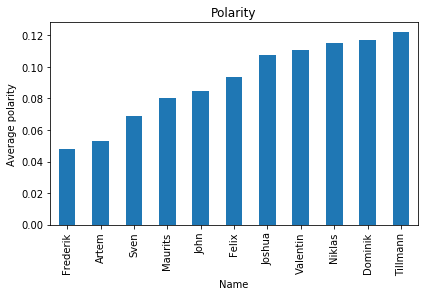

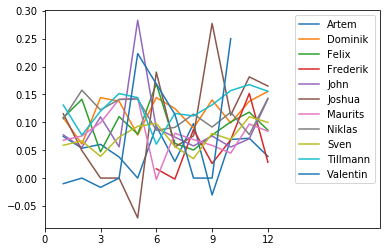

In [80]:
f, ax = plt.subplots()
for name, sub_df in df.groupby("name"):
    mean_polarity = sub_df.groupby(sub_df.index.month).mean()
    ax.plot(mean_polarity, label=name)
    
ax.set_xlim(0, 18)    
ax.set_xticks([0, 3, 6, 9, 12])
ax.legend()
f.savefig("results/polarity.png")

In [39]:
df.sort_values(by="polarity", ascending=False)

,name,text,polarity
date,,,
2019-02-08 15:29:05+00:00,Niklas,Ist halt echt weniger die Lautstärke als vielm...,1.0
2019-10-26 09:31:00+00:00,Felix,ja lassts euch gut gehen ihr süßis,1.0
2019-05-14 07:42:57+00:00,John,"Klar mach ich das, ich will dabei sein :D",1.0
2019-02-04 20:54:00+00:00,Niklas,"Kann ich sehr empfehlen, da hat Spotify echt w...",1.0
2019-04-18 12:12:18+00:00,Tillmann,Richtig so fick die uni,1.0
...,...,...,...
2019-10-24 14:36:50+00:00,Artem,schlimmes sticker pack,-1.0
2019-05-17 15:14:59+00:00,Maurits,heftklammer drücken,-1.0
2019-06-02 09:58:07+00:00,Niklas,war auch provokant,-1.0


In [43]:
df["2019-03-26 16:37:12+00:00"].text.values

array(['Ich denke halt, dass die Unternehmen sich damit eher selber schaden durch die schlechte Publicity, die sie dadurch dann eben indirekt bekommen'],
      dtype=object)